## Multi feature

In [1]:
### importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
### setting up the system path and taking the functions from the src
import sys
sys.path.append('../')
from src.graphs.graphs_metrices import metrices, plot_predictions, plot_graphs_post_scaling

In [4]:
### loading the same 'AAPL' dataset as of 18-02
df = pd.read_csv('../stocks/apple-18-2.csv')
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2021-02-19 00:00:00+00:00,129.87,130.7100,128.80,130.24,87668834,126.505301,127.323538,125.463023,126.865715,87668834,0.0,1.0
1,AAPL,2021-02-22 00:00:00+00:00,126.00,129.7200,125.60,128.01,102886922,122.735566,126.359187,122.345929,124.693491,102886922,0.0,1.0
2,AAPL,2021-02-23 00:00:00+00:00,125.86,126.7100,118.39,123.76,158273022,122.599193,123.427171,115.322727,120.553600,158273022,0.0,1.0
3,AAPL,2021-02-24 00:00:00+00:00,125.35,125.5600,122.23,124.94,111039904,122.102406,122.306966,119.063240,121.703029,111039904,0.0,1.0
4,AAPL,2021-02-25 00:00:00+00:00,120.99,126.4585,120.54,124.68,144766924,117.855366,123.182187,117.417025,121.449765,144766924,0.0,1.0


In [5]:
### making the copy dataset
df_copy = df.copy()
df_copy.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2021-02-19 00:00:00+00:00,129.87,130.7100,128.80,130.24,87668834,126.505301,127.323538,125.463023,126.865715,87668834,0.0,1.0
1,AAPL,2021-02-22 00:00:00+00:00,126.00,129.7200,125.60,128.01,102886922,122.735566,126.359187,122.345929,124.693491,102886922,0.0,1.0
2,AAPL,2021-02-23 00:00:00+00:00,125.86,126.7100,118.39,123.76,158273022,122.599193,123.427171,115.322727,120.553600,158273022,0.0,1.0
3,AAPL,2021-02-24 00:00:00+00:00,125.35,125.5600,122.23,124.94,111039904,122.102406,122.306966,119.063240,121.703029,111039904,0.0,1.0
4,AAPL,2021-02-25 00:00:00+00:00,120.99,126.4585,120.54,124.68,144766924,117.855366,123.182187,117.417025,121.449765,144766924,0.0,1.0


In [6]:
### taking the 4 features ['close', 'open', 'low', 'open']
features_to_target = ['high', 'low', 'open']
main_feature = ['close']

In [7]:
### scaling the features
from sklearn.preprocessing import MinMaxScaler
scaler_for_rest = MinMaxScaler(feature_range = (0, 1))
df[features_to_target] = scaler_for_rest.fit_transform(df[features_to_target])
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2021-02-19 00:00:00+00:00,129.87,0.061271,0.075349,0.067057,87668834,126.505301,127.323538,125.463023,126.865715,87668834,0.0,1.0
1,AAPL,2021-02-22 00:00:00+00:00,126.00,0.055386,0.056197,0.053718,102886922,122.735566,126.359187,122.345929,124.693491,102886922,0.0,1.0
2,AAPL,2021-02-23 00:00:00+00:00,125.86,0.037493,0.013047,0.028295,158273022,122.599193,123.427171,115.322727,120.553600,158273022,0.0,1.0
3,AAPL,2021-02-24 00:00:00+00:00,125.35,0.030656,0.036028,0.035353,111039904,122.102406,122.306966,119.063240,121.703029,111039904,0.0,1.0
4,AAPL,2021-02-25 00:00:00+00:00,120.99,0.035998,0.025914,0.033798,144766924,117.855366,123.182187,117.417025,121.449765,144766924,0.0,1.0


In [8]:
### separately targeting the scaler for the feature 'close'
scaler_for_close = MinMaxScaler(feature_range = (0, 1))
df[main_feature] = scaler_for_close.fit_transform(df[main_feature])
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2021-02-19 00:00:00+00:00,0.079550,0.061271,0.075349,0.067057,87668834,126.505301,127.323538,125.463023,126.865715,87668834,0.0,1.0
1,AAPL,2021-02-22 00:00:00+00:00,0.056763,0.055386,0.056197,0.053718,102886922,122.735566,126.359187,122.345929,124.693491,102886922,0.0,1.0
2,AAPL,2021-02-23 00:00:00+00:00,0.055938,0.037493,0.013047,0.028295,158273022,122.599193,123.427171,115.322727,120.553600,158273022,0.0,1.0
3,AAPL,2021-02-24 00:00:00+00:00,0.052935,0.030656,0.036028,0.035353,111039904,122.102406,122.306966,119.063240,121.703029,111039904,0.0,1.0
4,AAPL,2021-02-25 00:00:00+00:00,0.027263,0.035998,0.025914,0.033798,144766924,117.855366,123.182187,117.417025,121.449765,144766924,0.0,1.0


In [9]:
### updating the features_to_target list
features_to_target.insert(0, main_feature[0])
features_to_target

['close', 'high', 'low', 'open']

feature : close


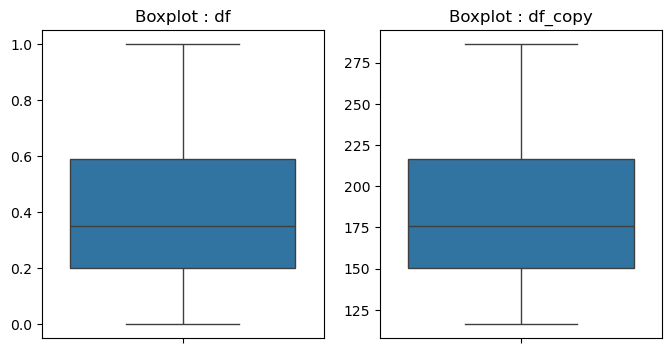

feature : high


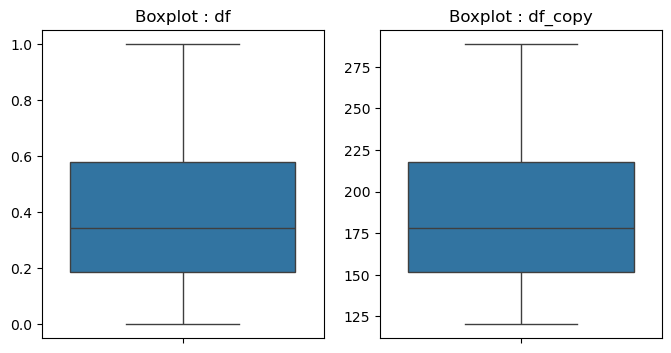

feature : low


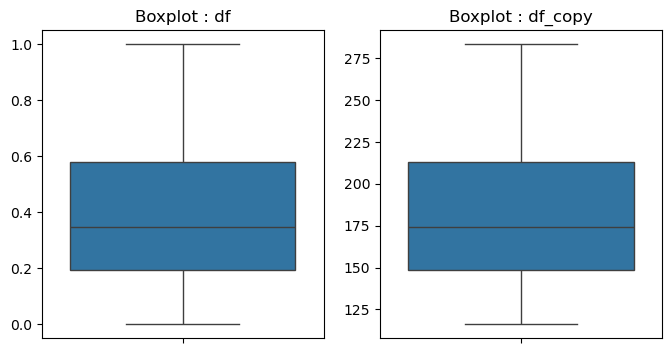

feature : open


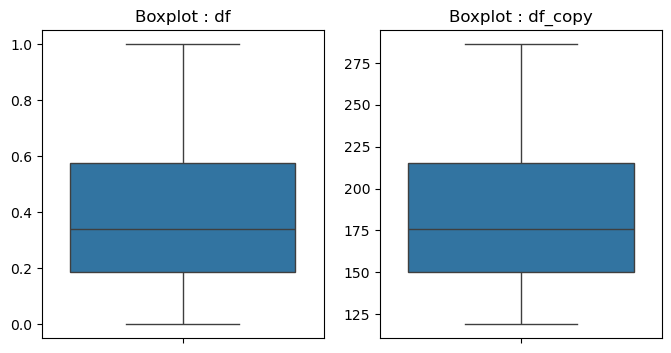

In [10]:
### checking for the features that were targeted only
plot_graphs_post_scaling(df, df_copy, features_to_target)

In [11]:
### checking the length of the df
len(df)

1255

In [12]:
### checking the list again
features_to_target

['close', 'high', 'low', 'open']

In [13]:
### creating the two sequences X and y for 90 days
### for the y say our target feature is 'close' 
X, y = [], []
days = 90

for i in range (len(df) - days) : 

    X.append(df[features_to_target][i : i + days])
    y.append(df[features_to_target[0]][i + days])

X = np.array(X)
y = np.array(y)

In [14]:
### checking the X and y
X

array([[[0.07955014, 0.06127149, 0.07534861, 0.06705749],
        [0.05676264, 0.05538623, 0.05619726, 0.05371777],
        [0.05593829, 0.03749267, 0.01304686, 0.02829455],
        ...,
        [0.10039451, 0.08463418, 0.10006583, 0.09224143],
        [0.09862804, 0.08017565, 0.09934766, 0.08631932],
        [0.1084614 , 0.08823073, 0.10257945, 0.08602022]],

       [[0.05676264, 0.05538623, 0.05619726, 0.05371777],
        [0.05593829, 0.03749267, 0.01304686, 0.02829455],
        [0.05293529, 0.03065625, 0.03602849, 0.03535323],
        ...,
        [0.09862804, 0.08017565, 0.09934766, 0.08631932],
        [0.1084614 , 0.08823073, 0.10257945, 0.08602022],
        [0.11758818, 0.09563189, 0.10856425, 0.09433511]],

       [[0.05593829, 0.03749267, 0.01304686, 0.02829455],
        [0.05293529, 0.03065625, 0.03602849, 0.03535323],
        [0.02726256, 0.03599757, 0.02591418, 0.03379793],
        ...,
        [0.1084614 , 0.08823073, 0.10257945, 0.08602022],
        [0.11758818, 0.095631

In [15]:
### checking y
y

array([0.11758818, 0.12129777, 0.12312312, ..., 0.82093859, 0.86863334,
       0.87140081])

In [16]:
### for the verification the value of 90th index of closing price at df['close'] should match the value
df['close'][90]

0.11758817641170594

In [17]:
### for the verification the value of 91th index of closing price at df['close'] should match the value
df['close'][91]

0.1212977683565919

In [18]:
### checking the shape of the X and y
print(f"{X.shape} :: {y.shape}")

(1165, 90, 4) :: (1165,)


In [19]:
### reshaping the y
y = y.reshape(-1, 1)
y.shape

(1165, 1)

In [20]:
### checking the y as well
y

array([[0.11758818],
       [0.12129777],
       [0.12312312],
       ...,
       [0.82093859],
       [0.86863334],
       [0.87140081]])

In [21]:
### checking the shape of the X and y
print(f"{X.shape} :: {y.shape}")

(1165, 90, 4) :: (1165, 1)


In [22]:
### creating train and test sequence now (test_size = 0.80)
test_size = int(len(df) * 0.80)
X_train, X_test = X[:test_size], X[test_size:]
y_train, y_test = y[:test_size], y[test_size:]

In [23]:
### checking the shape of the X_train, X_test, y_train and y_test
print(f"{X_train.shape} :: {y_train.shape} \n{X_test.shape} :: {y_test.shape}")

(1004, 90, 4) :: (1004, 1) 
(161, 90, 4) :: (161, 1)


In [24]:
### importing the libraries for the LSTM model
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, Bidirectional

In [25]:
### building a sequential model
model = Sequential([
    LSTM(50, return_sequences = True, input_shape = (days, 4)),
    Dropout(0.25),
    Bidirectional(LSTM(100)),
    Dropout(0.33),
    Dense(1, activation = 'linear')
])
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['mse'])

c:\Users\lenovo\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [26]:
### checking the model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 90, 50)         │        11,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 90, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 200)            │       120,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 200)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           201 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 132,001 (515.63 KB)

 Trainable params: 132,001 (515.63 KB)

 Non-trainable params: 0 (0.00 B)

In [27]:
### training the model
model.fit(X_train, y_train, batch_size = 32, epochs = 50, verbose = 1)

Epoch 1/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 47ms/step - loss: 0.0618 - mse: 0.0618
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - loss: 0.0045 - mse: 0.0045
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 0.0038 - mse: 0.0038
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - loss: 0.0030 - mse: 0.0030
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - loss: 0.0033 - mse: 0.0033
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - loss: 0.0033 - mse: 0.0033
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - loss: 0.0026 - mse: 0.0026
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - loss: 0.0031 - mse: 0.0031
Epoch 9/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - loss: 0.0025 - mse: 0.0025
Epoch 10/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step - loss: 0.0028 - mse: 0.0028
Epoch 11/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - loss: 0.0024 - mse: 0.0024
Epoch 12/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - loss: 0.0024 - mse: 0.0024
Epoch 13/50
32/32 ━━━━━━━━━━━━━━━━━━━

In [28]:
### predicting on the y_test which is technically df['close]
y_pred = model.predict(X_test)
y_pred

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step


array([[0.5063034 ],
       [0.50977045],
       [0.51992965],
       [0.534774  ],
       [0.5507913 ],
       [0.5589465 ],
       [0.5607195 ],
       [0.55985445],
       [0.5605667 ],
       [0.5607627 ],
       [0.5574465 ],
       [0.55463177],
       [0.5536298 ],
       [0.5536062 ],
       [0.5548832 ],
       [0.5592019 ],
       [0.5651058 ],
       [0.5704805 ],
       [0.5742774 ],
       [0.57658035],
       [0.57754564],
       [0.57472736],
       [0.5674369 ],
       [0.5581009 ],
       [0.5454176 ],
       [0.53335667],
       [0.5244885 ],
       [0.52991515],
       [0.5538079 ],
       [0.58713776],
       [0.6171705 ],
       [0.64029783],
       [0.6602271 ],
       [0.6733675 ],
       [0.6781534 ],
       [0.6780204 ],
       [0.6744536 ],
       [0.66553056],
       [0.6537213 ],
       [0.64798945],
       [0.6461961 ],
       [0.64730155],
       [0.6529179 ],
       [0.6616144 ],
       [0.6700203 ],
       [0.67038125],
       [0.68206644],
       [0.696

In [29]:
### inverse scaling the y_test and y_pred
y_test = scaler_for_close.inverse_transform(y_test)
y_pred = scaler_for_close.inverse_transform(y_pred)

In [30]:
### for the comparison plotting the graphs and the metrices
metrices(y_test, y_pred)

MAE : 4.582546117557503
MSE : 34.94423602535313
RMSE : 5.9113649883384065


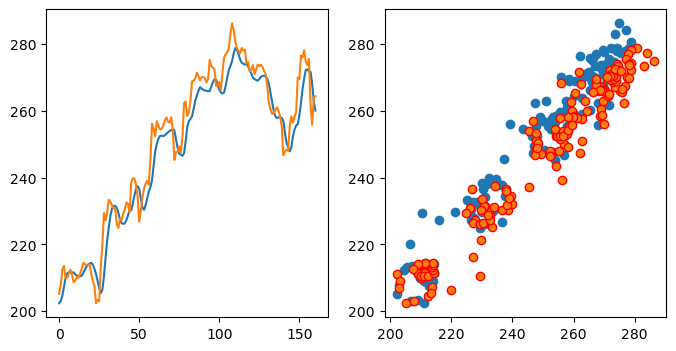

In [31]:
### plotting out the things
plot_predictions(y_test, y_pred)